lstm encoder_decoder :loss: 0.0031 - val_loss: 0.0049
conv1d auto encoder  :loss: 0.0012 - val_loss: 0.0027
conv1d + lstm auto_encoder loss: 0.0013 - val_loss: 0.0024
Multi-head Attention + Bilstm encoder-decoder loss: 0.0021 - val_loss: 0.0023

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [71]:
raw_path = '../../nyc_taxi.csv'
train_path = '../../nyc_taxi_train.csv'
test_path = '../../nyc_taxi_test.csv'

In [80]:
data = pd.read_csv(raw_path,usecols=[1,2])
train = pd.read_csv(train_path,usecols=[2,3])
test = pd.read_csv(test_path,usecols=[2,3])

In [89]:
lstmEncDec_path = '../anomaly_detection/lstmEncDnc_yHat.npy'
conv1dAE_path = '../anomaly_detection/Conv1DAutoEncoder_yHat.npy'
conv1dLstmAE_path = '../anomaly_detection/conv1DLSTM_yHat.npy'
attnBiLSTM_path = '../anomaly_detection/AttnBi-LSTM0024.npy'
lstmEncDec = np.load(lstmEncDec_path)
conv1dAE = np.load(conv1dAE_path)
conv1dLstmAE = np.load(conv1dLstmAE_path)
attnBiLSTM = np.load(attnBiLSTM_path)

In [101]:
print('>>> ',np.shape(lstmEncDec))
print('>>> ',np.shape(conv1dAE))
print('>>> ',np.shape(conv1dLstmAE))
print('>>> ',np.shape(attnBiLSTM))
scaler = MinMaxScaler()
data_all = scaler.fit_transform(data['value'].values.reshape(-1,1))

>>>  (989, 1)
>>>  (989, 1)
>>>  (989, 1)
>>>  (989, 1)


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [103]:
lstmEncDec_inv = scaler.inverse_transform(lstmEncDec)
conv1dAE_inv = scaler.inverse_transform(conv1dAE)
conv1dLstmAE_inv = scaler.inverse_transform(conv1dLstmAE)
attnBiLSTM_inv = scaler.inverse_transform(attnBiLSTM)

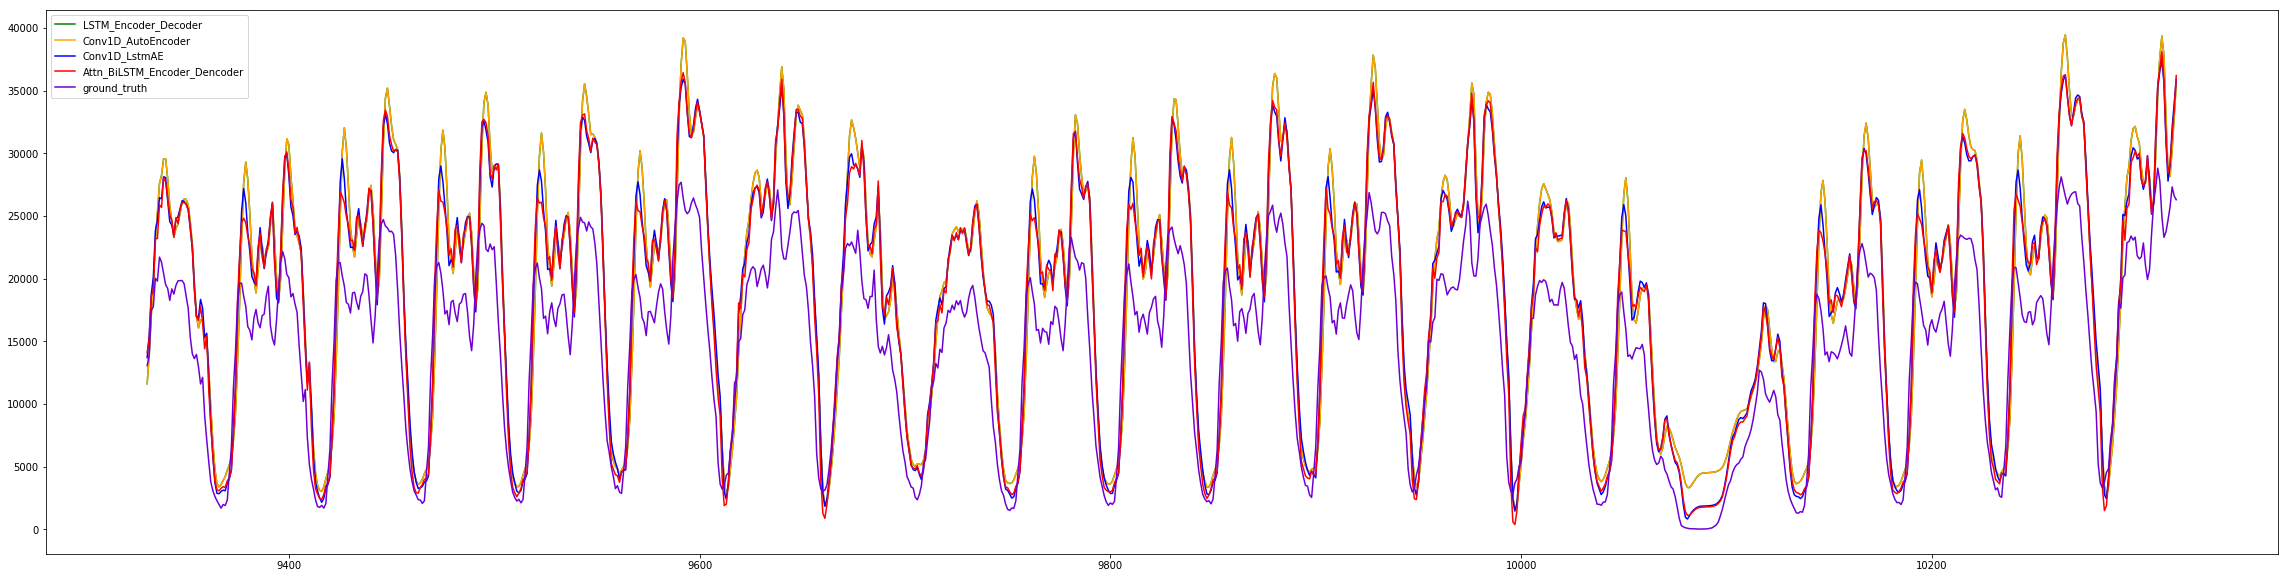

In [175]:
y_true = test.values[11:,1]
plt.figure(figsize = (40,10))
plt.plot(range(9331,10320),lstmEncDec_inv,label='LSTM_Encoder_Decoder',c='green')
plt.plot(range(9331,10320),conv1dAE_inv,label='Conv1D_AutoEncoder',c='orange')
plt.plot(range(9331,10320),conv1dLstmAE_inv,label='Conv1D_LstmAE',c='blue')
plt.plot(range(9331,10320),attnBiLSTM_inv,label='Attn_BiLSTM_Encoder_Dencoder',c='red')
plt.plot(range(9331,10320),data.values[9331::,1],label = 'ground_truth',c='#6F00D2')
plt.legend()
plt.show()

In [140]:
test.values[::,1].shape

(1000,)

In [146]:
range(10320)

range(9331, 10320)

In [167]:
data.values[9331::10320,1]

array([13052], dtype=object)

In [196]:
from sklearn.metrics import mean_squared_error,r2_score

In [198]:
(np.sqrt(mean_squared_error(y_true[:200],y_hat[:200])))

5650.6393812853985

In [187]:
y_hat = attnBiLSTM_inv.reshape(-1)

In [188]:
y_hat.shape

(989,)

In [189]:
y_true.shape

(989,)

In [197]:
r2_score(y_true,y_hat)

0.43266928220029366

In [200]:
conv1dAE_100_path = '../anomaly_detection/Conv1DAutoEncoder_yHat_100.npy'
conv1dAE_100 = np.load(conv1dAE_100_path)
conv1dAE_100_inv = scaler.inverse_transform(conv1dAE_100)

In [202]:
conv1dAE_100_inv.shape

(899, 1)

In [203]:
y_true = test.values[11:,1]

In [208]:
y_true[-899::]

array([11432, 14929, 19814, 21295, 21258, 20209, 19420, 18088, 17942,
       17251, 18843, 18906, 18117, 17533, 18593, 18967, 20374, 20245,
       18663, 16688, 14860, 16990, 20233, 23012, 24353, 24698, 24188,
       24033, 23737, 23774, 23522, 21828, 18996, 15659, 12989, 10584,
       7941, 6221, 4792, 3814, 3053, 2725, 2356, 2327, 2058, 2267, 4547,
       6582, 12004, 15442, 20021, 20953, 21276, 20444, 19071, 17173,
       17446, 16319, 18120, 18258, 17222, 16563, 17953, 18119, 18740,
       18803, 17318, 15354, 14243, 16310, 20078, 22844, 23895, 24410,
       24216, 22351, 22154, 22757, 22301, 22537, 19647, 16555, 13935,
       10852, 8131, 6253, 4881, 3872, 2952, 2530, 2242, 2384, 2102, 2353,
       4388, 6600, 11844, 15429, 19536, 20800, 21237, 20044, 19195, 16819,
       17002, 15592, 17319, 18062, 16821, 16158, 17614, 17978, 18693,
       18743, 17213, 15389, 13926, 16336, 19647, 22732, 24064, 24881,
       24507, 24438, 23792, 24517, 24126, 23957, 22825, 21086, 17957,
       14